# Advertising Sales Channel Prediction

**When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 
The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.**

# Importing the dataset

In [59]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('Advertising Sales Channel Prediction.csv')

In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Getting the Basic Outlook Over the DataSet

In [5]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
df.shape

(200, 4)

Observations:
    
    1.There are 200 rows and 4 columns.

In [7]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [8]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# EDA

# Univariate Analysis

In [10]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Column 1-TV**

<AxesSubplot:xlabel='TV', ylabel='Density'>

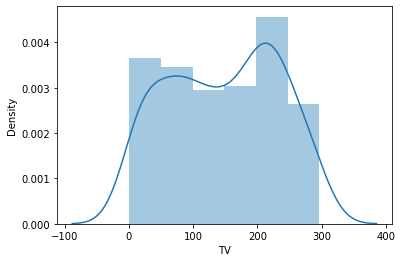

In [11]:
sns.distplot(df['TV'])

Observations:
    
    1.The range of the TV is from 0 to 300.

<AxesSubplot:xlabel='TV'>

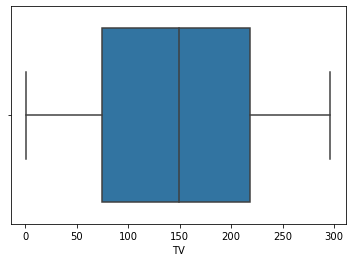

In [12]:
sns.boxplot(df['TV'])

Observations:
    
    1.There are no outliers.

**Column2-Radio**

<AxesSubplot:xlabel='radio', ylabel='Density'>

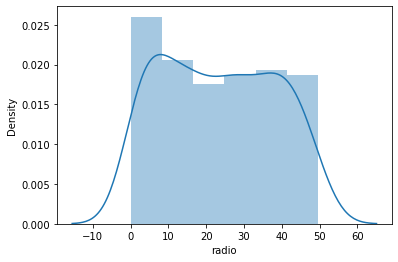

In [13]:
sns.distplot(df['radio'])

Observations:
    
    1.The value of the radio ranges from the 0 to 50.

<AxesSubplot:xlabel='radio'>

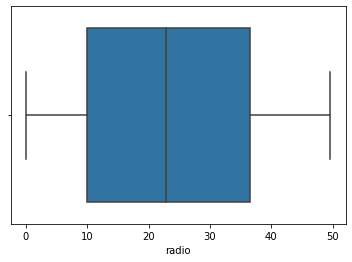

In [14]:
sns.boxplot(df['radio'])

Observations:
    
    1.There are no outliers.

**Column3-Newspaper**

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

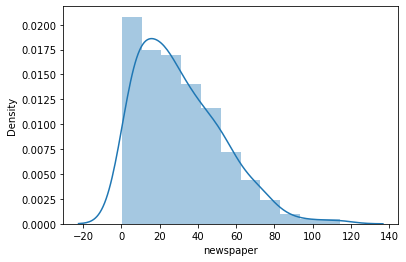

In [15]:
sns.distplot(df['newspaper'])

Observations:
    
    1.The distribution strategy ranges from 0 to 110.

<AxesSubplot:xlabel='newspaper'>

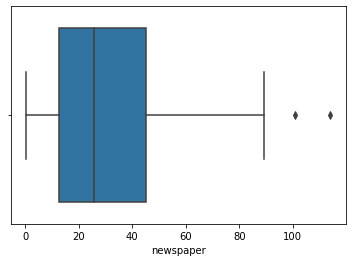

In [16]:
sns.boxplot(df['newspaper'])

Observations:
    
    1.There are few outliers.

# Multivariate Analysis

In [17]:
from heatmap import heatmap,corrplot

In [18]:
import matplotlib.pyplot as plt

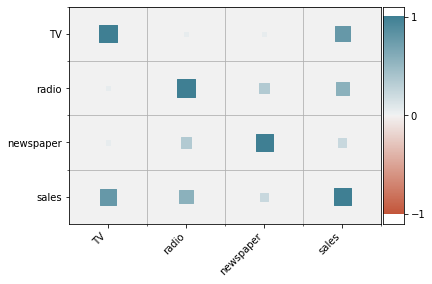

In [19]:
plt.plot()
corrplot(df.corr(),size_scale=300)
plt.show()

Observations:
    
    1.From the corrplot we can clearly see that the TV has more correlation with the sales followed by radio and sales.

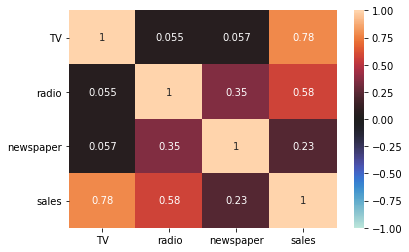

In [20]:
plt.figure()
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

Observations:
    
    1.From the above data we can conclude that the sales can be increased in the significant way by concentrating more on the Tv and Radio.

In [21]:
df['sales'].describe()

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: sales, dtype: float64

**Lets fix a bench mark that if sales is more than 15 lets name that as good or label it as 1 and if sales is less than 15 then lets it be poor or 0**

In [22]:
df1=df

In [23]:
sale=[]
for i in range(0,len(df1['sales'])):
    if df1['sales'][i]>15:
        sale.append(1)
    else:
        sale.append(0)

In [24]:
sale

[1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0]

In [25]:
df1=df1.drop('sales',axis=1)

In [26]:
df1['sales']=sale

In [27]:
df1.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,1
1,44.5,39.3,45.1,0
2,17.2,45.9,69.3,0
3,151.5,41.3,58.5,1
4,180.8,10.8,58.4,0


In [28]:
group=df1.groupby('sales')

In [29]:
good=group.get_group(1)

In [30]:
poor=group.get_group(0)

In [32]:
good.describe()

,TV,radio,newspaper,sales
count,75.000000,75.000000,75.000000,75.0
mean,213.901333,34.056000,36.021333,1.0
std,49.439651,9.802926,23.572690,0.0
min,93.900000,13.900000,0.300000,1.0
25%,186.350000,27.300000,15.050000,1.0
50%,216.400000,34.600000,37.700000,1.0
75%,248.600000,42.150000,54.050000,1.0
max,296.400000,49.600000,100.900000,1.0


In [33]:
poor.describe()

,TV,radio,newspaper,sales
count,125.000000,125.000000,125.000000,125.0
mean,106.927200,16.788800,27.273600,0.0
std,77.747002,13.553313,20.016252,0.0
min,0.700000,0.000000,0.900000,0.0
25%,43.000000,5.200000,11.900000,0.0
50%,89.700000,12.600000,23.200000,0.0
75%,165.600000,25.900000,35.700000,0.0
max,290.700000,49.400000,114.000000,0.0


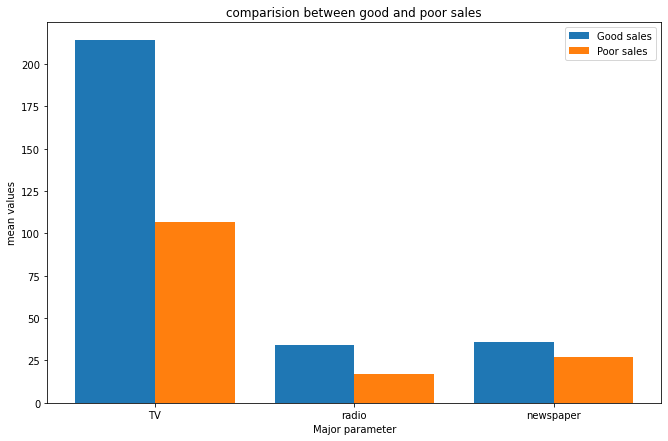

In [35]:
import numpy as np
X =['TV','radio','newspaper']
yp = [213.901333,34.056000,36.021333]
yq = [106.927200,16.788800,27.273600]
plt.figure(figsize=(11,7))  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, yp, 0.4, label = 'Good sales')
plt.bar(X_axis + 0.2, yq, 0.4, label = 'Poor sales')
  
plt.xticks(X_axis, X)
plt.xlabel("Major parameter")
plt.ylabel("mean values")
plt.title("comparision between good and poor sales")
plt.legend()
plt.show()

Observations:
    
    1.For good sales the value of marketing through tv should be more than 200 and radio should be more than 30 and newspaper should be more than 40.

# Bi variate Analysis

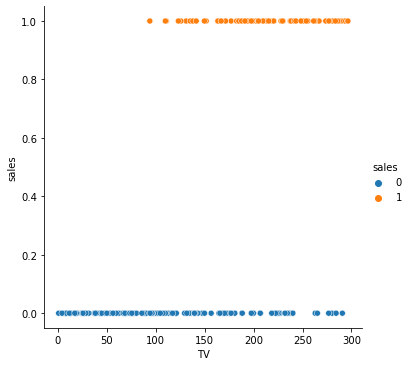

In [37]:
sns.relplot(x='TV',y='sales',hue='sales',data=df1)

Observations:
    
    1.For having a good sale the value of the Tv should be atleast more than 100.

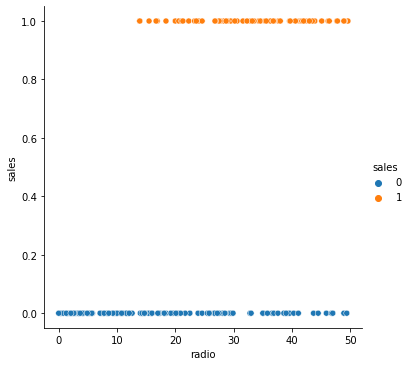

In [38]:
sns.relplot(x='radio',y='sales',hue='sales',data=df1)

Observations:
    
    1.The value of the radio should be atleast more than 10 for a good sale.

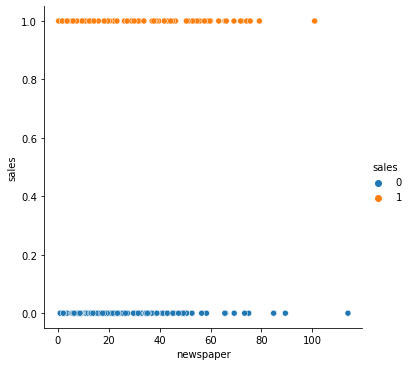

In [39]:
sns.relplot(x='newspaper',y='sales',hue='sales',data=df1)

Observations:
    
    1.There is no significant observations.

# Data Cleaning

In [40]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [48]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [49]:
from scipy.stats import zscore

In [51]:
z=np.abs(zscore(df))
threshold=3
df11=df[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df.shape[0]-df11.shape[0])/df.shape[0])

percentage of loss of data by zscore is : 0.01


# Splitting the target variable

In [52]:
x=df11.drop('sales',axis=1)
y=df11['sales']

In [53]:
x.shape

(198, 3)

In [54]:
y.shape

(198,)

# Removing the skewness

In [55]:
x.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
dtype: float64

In [56]:
x['newspaper']=np.sqrt(x['newspaper'])

In [57]:
x.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
dtype: float64

# Building the model

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [61]:
maxAccu=0
ln=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    mod=ln
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.9359870808019578 on random state 90


In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=90)

In [63]:
print('x train shape:',x_train.shape)
print('x test shape',x_test.shape)
print('\n')
print('y train shape:',y_train.shape)
print('y test shape',y_test.shape)

x train shape: (138, 3)
x test shape (60, 3)


y train shape: (138,)
y test shape (60,)


In [64]:
#linear model
ln=LinearRegression()
ln.fit(x_train,y_train)
predln=ln.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predln)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predln)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predln)),3))

r2 score is : 0.936
RMSE: 1.255
mean absolute error: 1.028


In [65]:
#lasso model
ls=Lasso(alpha=0.00001)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predls)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predls)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predls)),3))

r2 score is : 0.936
RMSE: 1.255
mean absolute error: 1.028


In [66]:
#Ridge model
rd=Ridge(alpha=0.01)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrd)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrd)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrd)),3))

r2 score is : 0.936
RMSE: 1.255
mean absolute error: 1.028


In [71]:
#ElasticNet model
enr=ElasticNet(alpha=0.1)
enr.fit(x_train,y_train)
predenr=enr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predenr)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predenr)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predenr)),3))

r2 score is : 0.937
RMSE: 1.25
mean absolute error: 1.02


In [72]:
ran = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
ran.fit(x_train, y_train)
predran=ran.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predran)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predran)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predran)),3))

r2 score is : 0.803
RMSE: 2.202
mean absolute error: 1.577


In [73]:
sgd = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd.fit(x_train, y_train)
predsgd=sgd.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predsgd)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predsgd)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predsgd)),3))

r2 score is : 0.906
RMSE: 1.523
mean absolute error: 1.282


In [74]:
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf)),3))

r2 score is : 0.974
RMSE: 0.806
mean absolute error: 0.656


# Cross validation score

In [75]:
models=[ln,ls,rd,enr,ran,sgd,rf]
for m in models:
    
    score=cross_val_score(m,x,y,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LinearRegression() score is:
0.886


Lasso(alpha=1e-05) score is:
0.886


Ridge(alpha=0.01) score is:
0.886


ElasticNet(alpha=0.1) score is:
0.886


RANSACRegressor(base_estimator=LinearRegression()) score is:
0.889


SGDRegressor(eta0=0.0001, max_iter=100000, n_iter_no_change=250, penalty=None) score is:
0.859


RandomForestRegressor(n_estimators=1000) score is:
0.976




Observations:
    
    The difference between r2 score and cross val score is as follows.
    1.LinearRegression=0.05
    2.Lasso           =0.05
    3.Ridge           =0.05
    4.ElasticNet      =0.051
    5.RANSACRegressor =-0.086
    6.SGD             =0.047
    7.RandomForestRegressor=-0.002
    
   **Hence RandomForestRegressor is the best model**

# Hyper Parameter Tuning

In [77]:
rf=RandomForestRegressor()
grid_param={
    'criterion':['mse','mae'],
    'bootstrap':[True,False]
}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='r2',
                  cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'bootstrap': True, 'criterion': 'mae'}
0.977159644423681


In [82]:
rf = RandomForestRegressor(bootstrap=True,criterion='mae')
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrf)),3))
print('RMSE:',round(np.sqrt(mean_squared_error(y_test,predrf)),3))
print('mean absolute error:',round((mean_absolute_error(y_test,predrf)),3))

r2 score is : 0.975
RMSE: 0.783
mean absolute error: 0.64


**The maximum accuracy we got is 0.975**

# Saving the Model

In [83]:
#import joblib
#joblib.dump(rf,'rfsales.obj')

['rfsales.obj']